# House Prices
### Predicting sales prices

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import linear_model
from pygam import LinearGAM, s, f

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Id column won't be of use
df_train = df_train.drop('Id', axis=1)
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_dict = {
    "Data type": df_train.dtypes,
    "NA count": df_train.isna().sum(),
    "Unique values": df_train.nunique()
}
dt_na = pd.DataFrame(train_dict)

dt_na["Data type"].unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
feature_object = dt_na[dt_na['Data type'] == 'object']
feature_numeric = dt_na[dt_na['Data type'] != 'object']

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

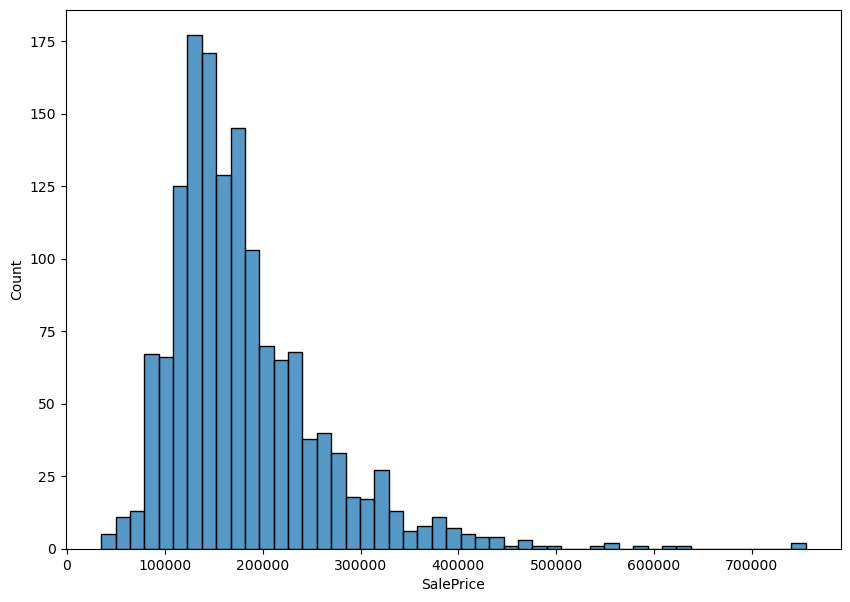

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(df_train['SalePrice'])

### Object features exploration

In [7]:
feature_object

,Data type,NA count,Unique values
MSZoning,object,0,5
Street,object,0,2
Alley,object,1369,2
LotShape,object,0,4
LandContour,object,0,4
Utilities,object,0,2
LotConfig,object,0,5
LandSlope,object,0,3
Neighborhood,object,0,25
Condition1,object,0,9


In [8]:
NA_objects = feature_object[feature_object['NA count']>0]
NA_objects

,Data type,NA count,Unique values
Alley,object,1369,2
MasVnrType,object,8,4
BsmtQual,object,37,4
BsmtCond,object,37,4
BsmtExposure,object,38,4
BsmtFinType1,object,37,6
BsmtFinType2,object,38,6
Electrical,object,1,5
FireplaceQu,object,690,5
GarageType,object,81,6


**NA Values meaning**:

**Alley** - Absence of alley access  
**MasVnrType** - Absence of Masonry veneer  
**Bsmt** - Absence of basement  
**Electrical** - Just missing data  
**FireplaceQu** - No fireplace  
**Garage___** - No garage  
**PoolQC** - No pool  
**Fence** - No fence  
**MiscFeature** - Absence of any extra features

In [9]:
Absent_features = [_ for _ in feature_object.index if _ != 'Electrical']

# Removal of missing data
df_train.dropna(subset='Electrical', inplace=True, axis=0)

# Filling NA values with 0 corresponding to absence of feature
for _ in Absent_features:
    df_train[_] = df_train[_].fillna(0)

# Select object type features will get transformed with get_dummies
pd.get_dummies(df_train['MasVnrType'], drop_first=True, prefix='MasVnrType').head()

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [10]:
object_removal = [
   #'MSZoning', 
   'Street', 
   'Alley', 
   'LotShape', 
   'LandContour', 
   #'Utilities',
   'LotConfig', 
   'LandSlope', 
   'Neighborhood', 
   'Condition1', 
   'Condition2',
   'BldgType', 
   'HouseStyle', 
   'RoofStyle', 
   'RoofMatl', 
   'Exterior1st',
   'Exterior2nd',
   'MasVnrType', 
   'ExterQual', 
   'ExterCond', 
   #'Foundation',
   #'BsmtQual', 
   #'BsmtCond', 
   'BsmtExposure', 
   'BsmtFinType1', 
   'BsmtFinType2',
   'Heating', 
   'HeatingQC', 
   'CentralAir', 
   'Electrical', 
   'KitchenQual',
   #'Functional', 
   'FireplaceQu', 
   'GarageType', 
   'GarageFinish', 
   'GarageQual',
   'GarageCond', 
   'PavedDrive', 
   'PoolQC', 
   'Fence', 
   'MiscFeature',
   'SaleType', 
   'SaleCondition'
       ]

for _ in object_removal:
    df_train = df_train.drop([_], axis=1)

### Numeric Feature exploration

In [11]:
feature_numeric

,Data type,NA count,Unique values
MSSubClass,int64,0,15
LotFrontage,float64,259,110
LotArea,int64,0,1073
OverallQual,int64,0,10
OverallCond,int64,0,9
YearBuilt,int64,0,112
YearRemodAdd,int64,0,61
MasVnrArea,float64,8,327
BsmtFinSF1,int64,0,637
BsmtFinSF2,int64,0,144


**NA Values meaning**:

**LotFrontage** - Absence of alley access  
**MasVnrArea** - Just missing data  
**GarageYrBlt** - Absent garage has no year built  

In [12]:
numeric_removal = [
    'MSSubClass', 
    'GarageYrBlt', 
    'YearRemodAdd', 
    'TotalBsmtSF', 
    'TotRmsAbvGrd'
]

for _ in numeric_removal:
    df_train = df_train.drop([_], axis=1)

In [13]:
# Removal of missing data
df_train.dropna(subset=['MasVnrArea'], inplace=True, axis=0)

# Filling NA values with 0 corresponding to absence of feature
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

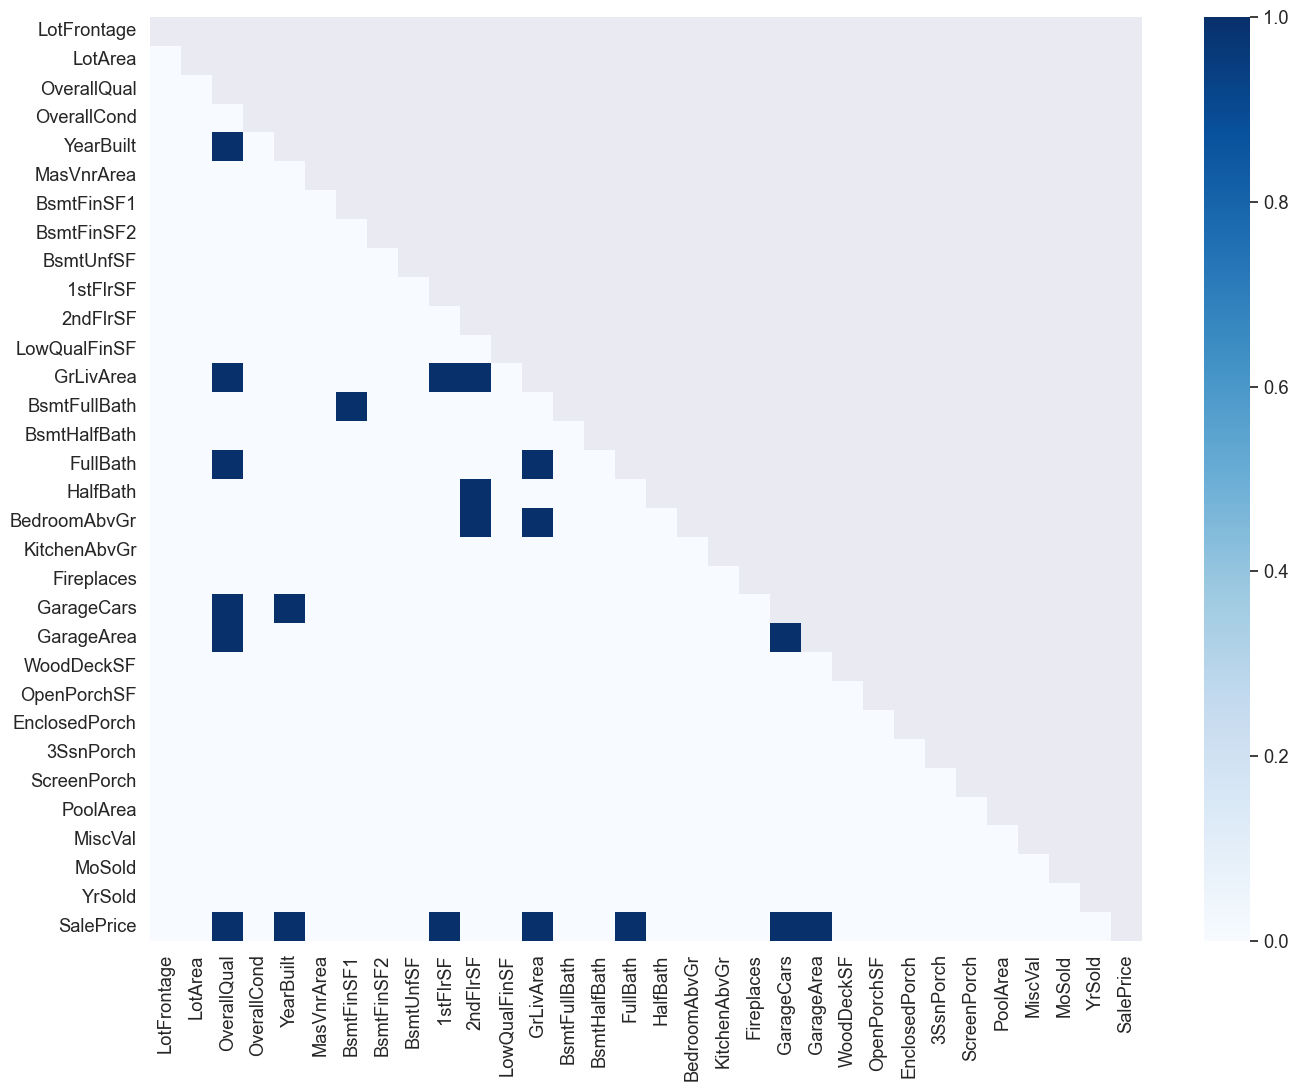

In [14]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(16, 12))

num_cols = [_ for _ in feature_numeric.index if _ not in numeric_removal]

sns_mask = np.triu(np.ones_like(df_train[num_cols].corr()))
sns.heatmap(df_train[num_cols].corr()>0.5, cmap='Blues', fmt='.2f', mask=sns_mask)
plt.show()

Although there are highly correlated features, their removal would decrease model performance

C:\Users\Michal\AppData\Local\Temp\ipykernel_8984\3449046785.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


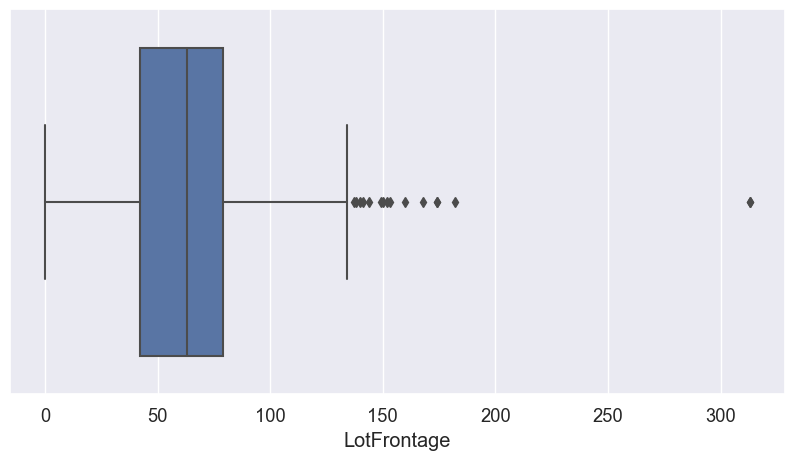

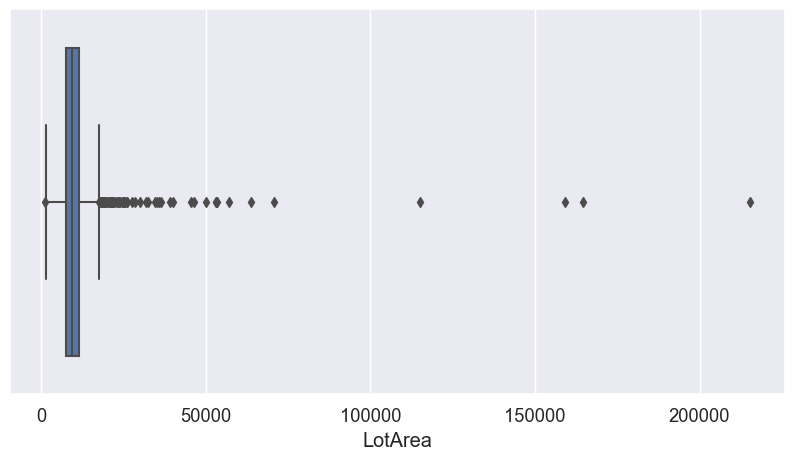

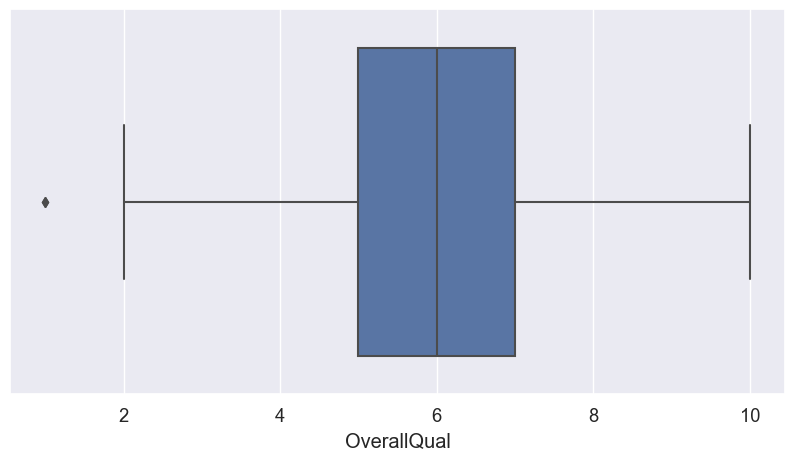

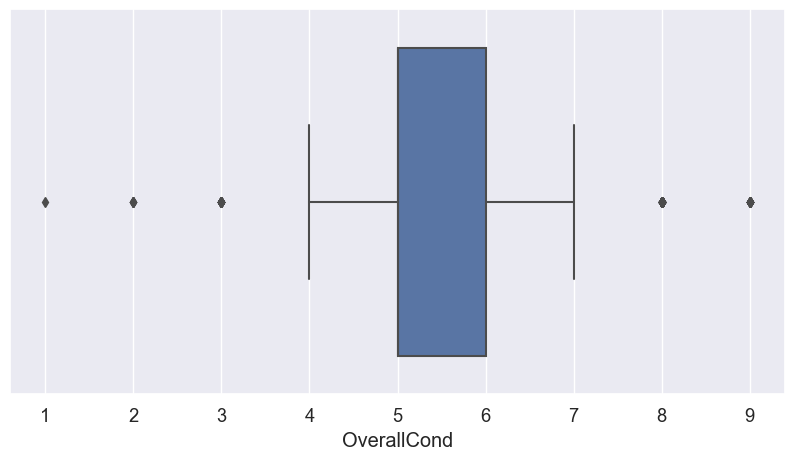

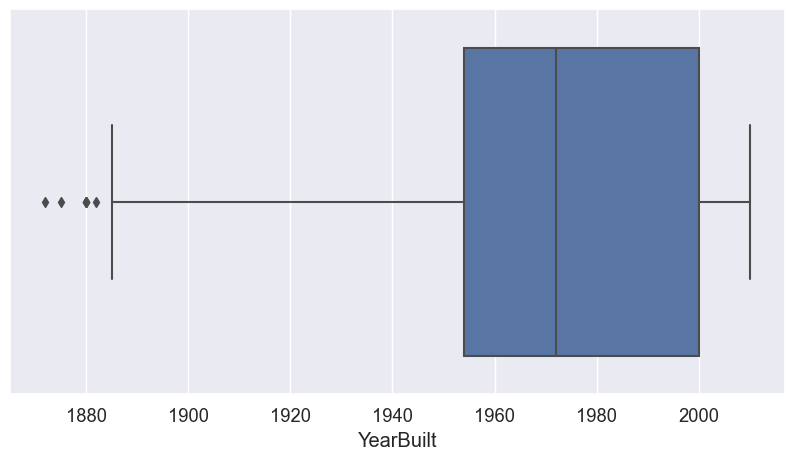

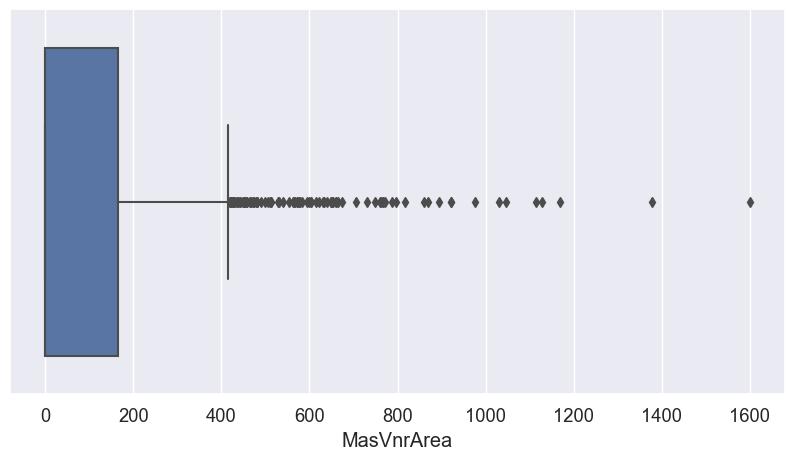

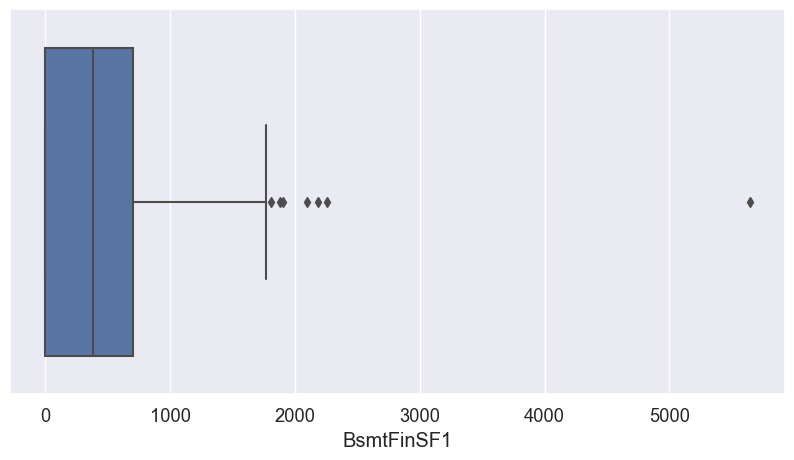

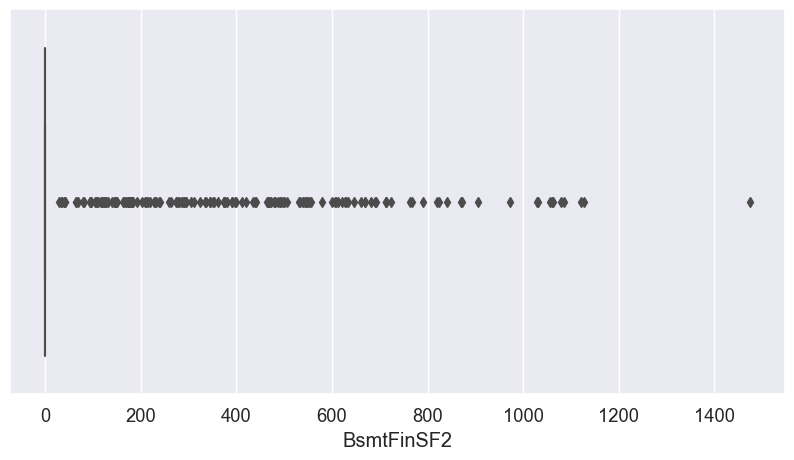

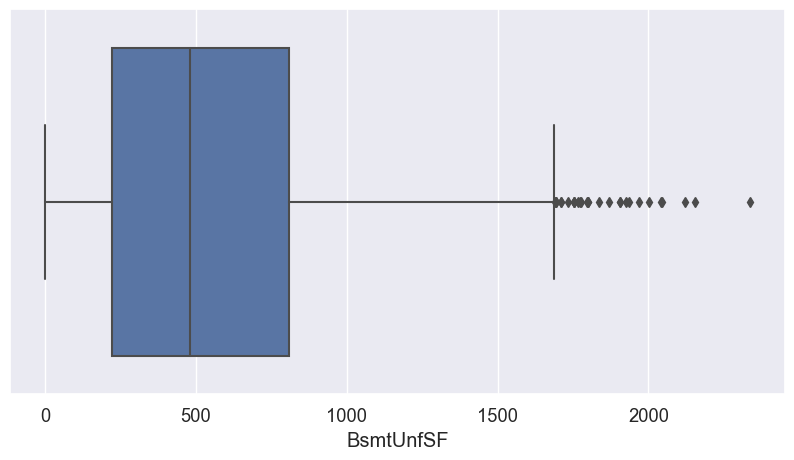

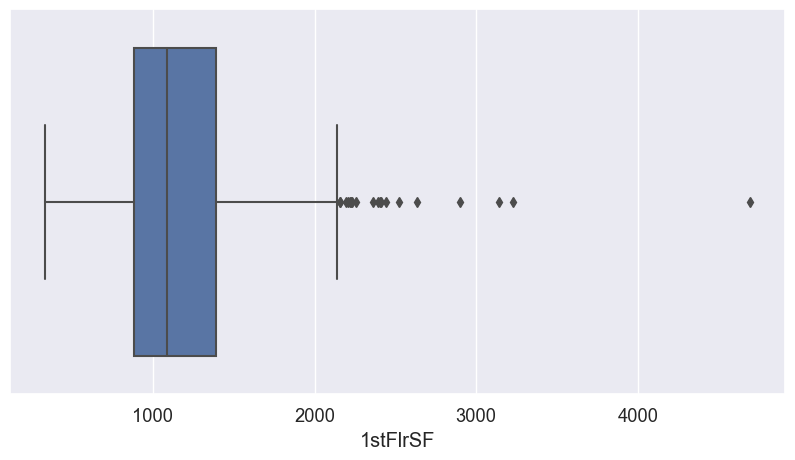

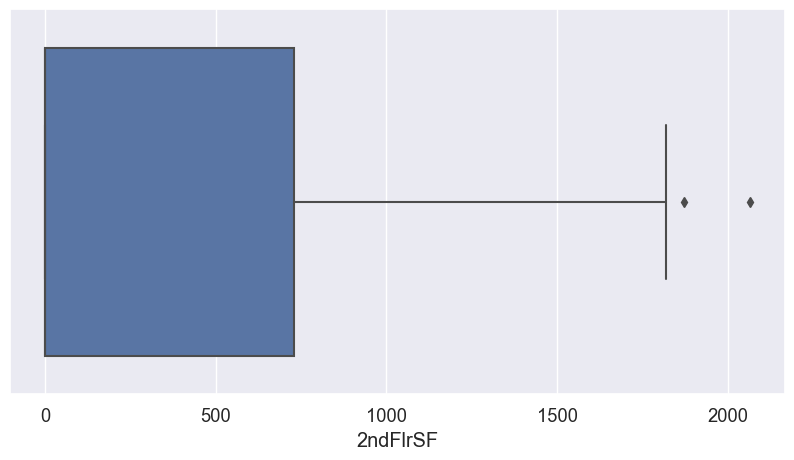

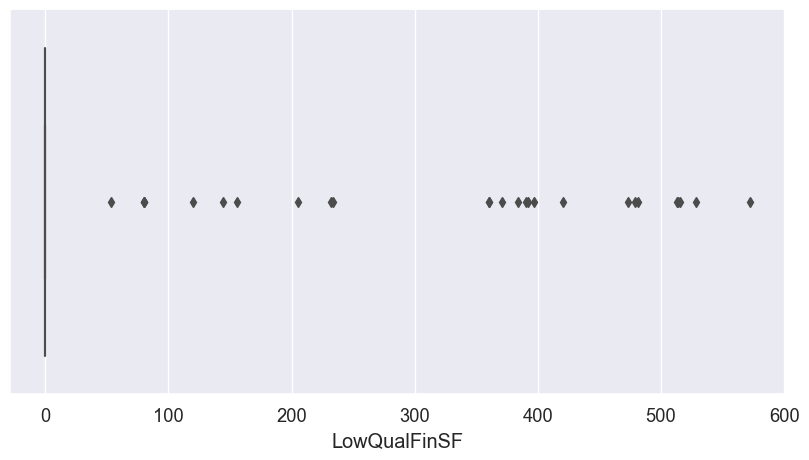

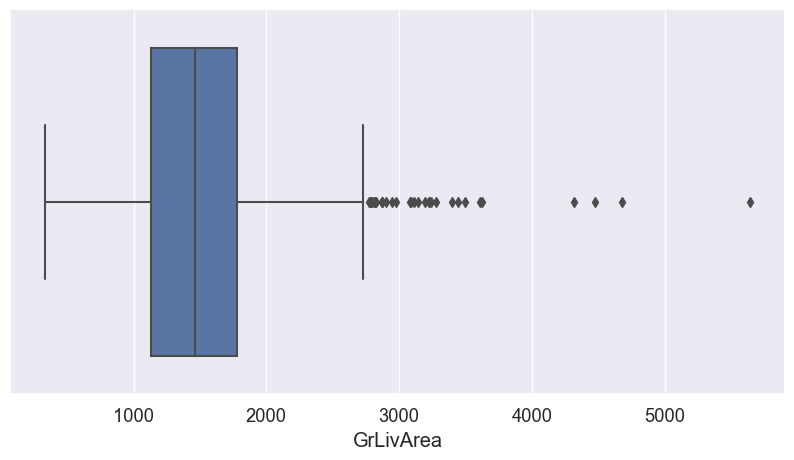

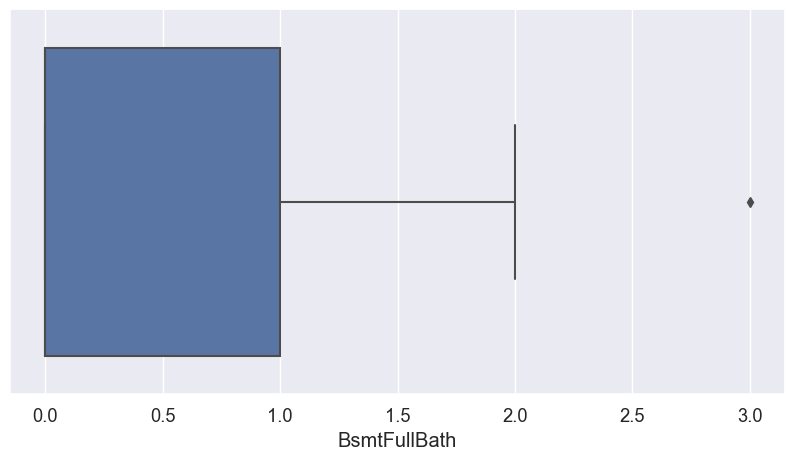

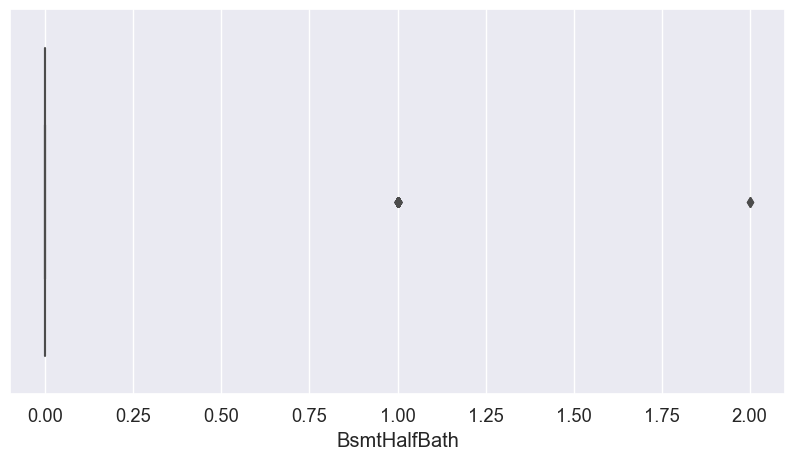

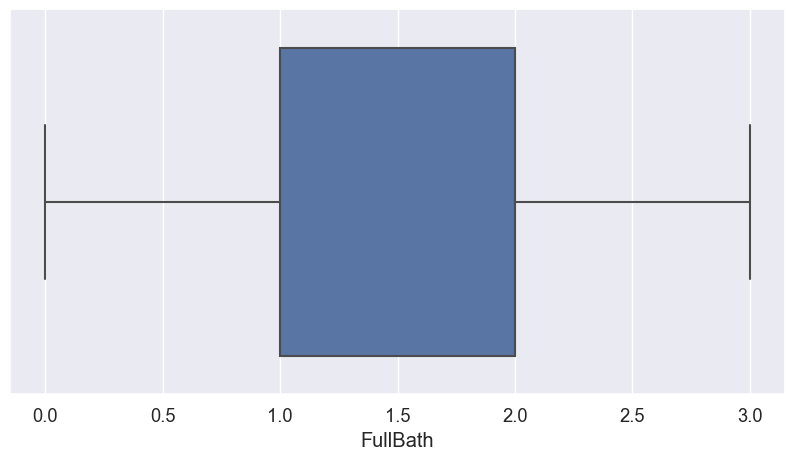

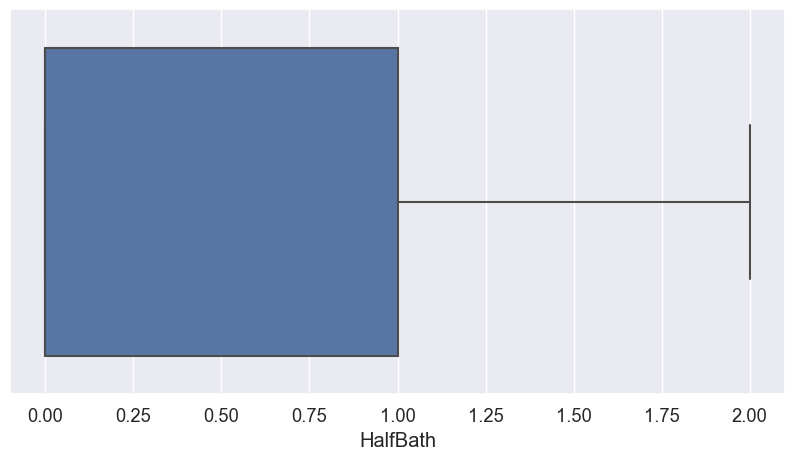

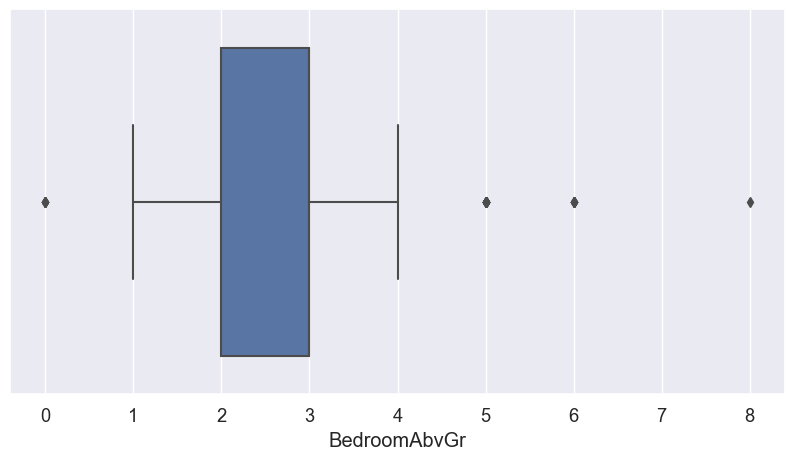

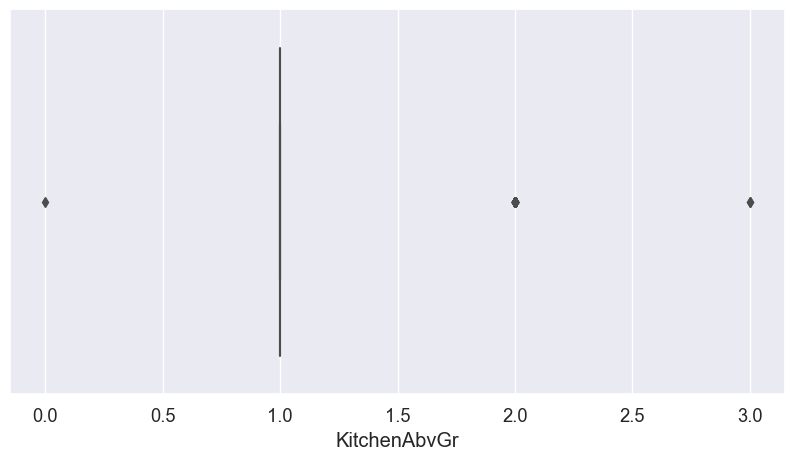

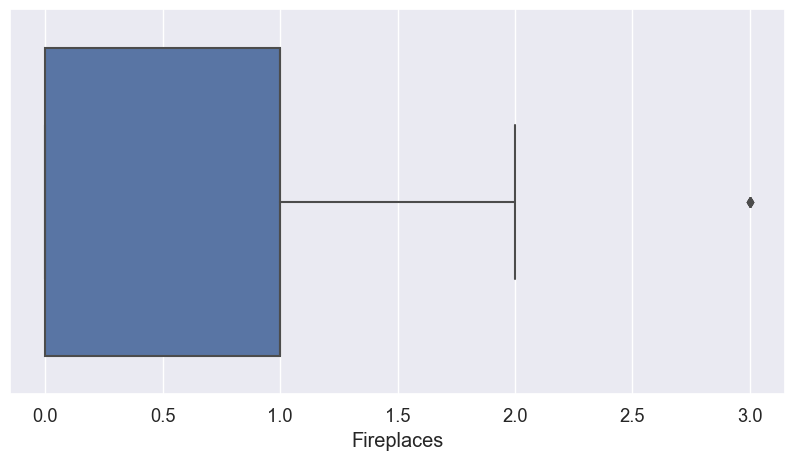

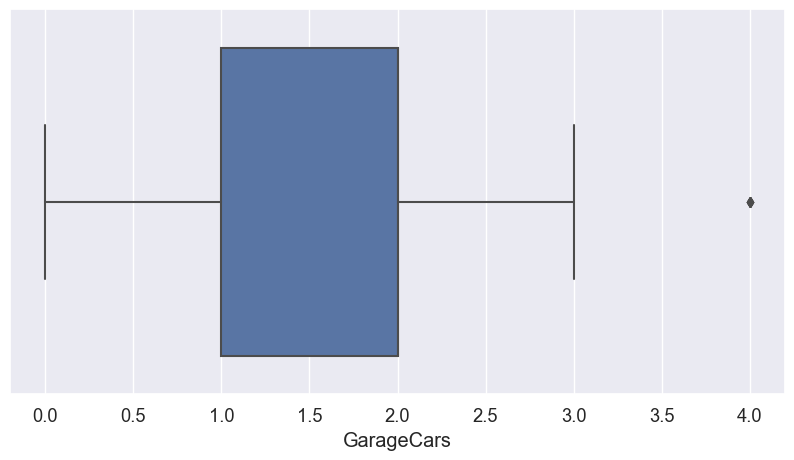

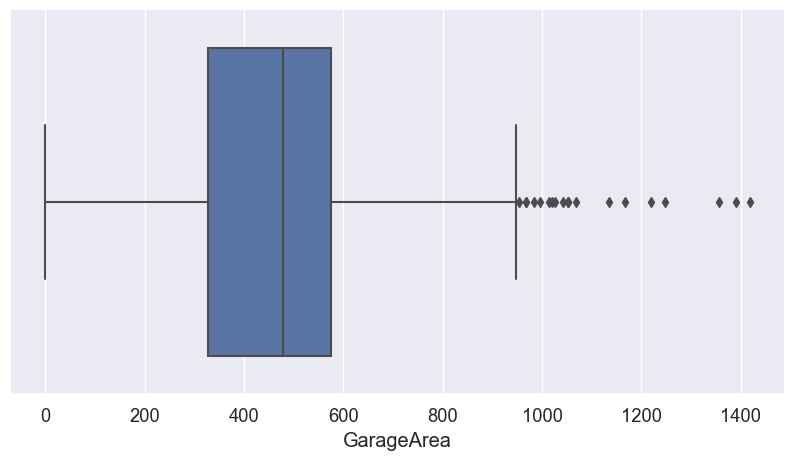

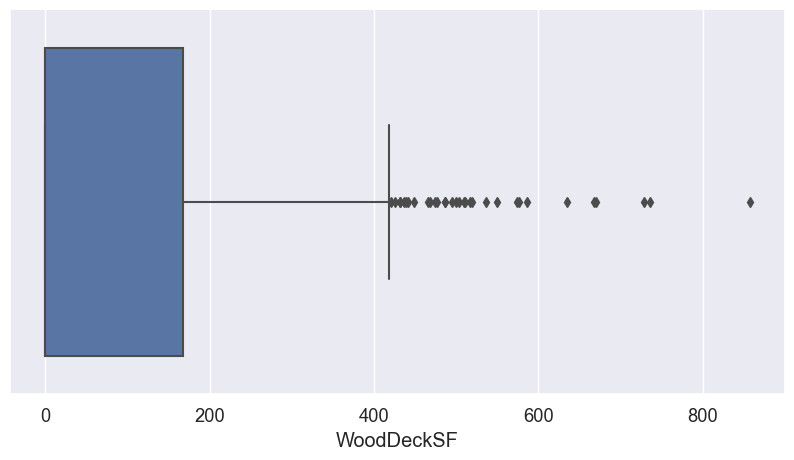

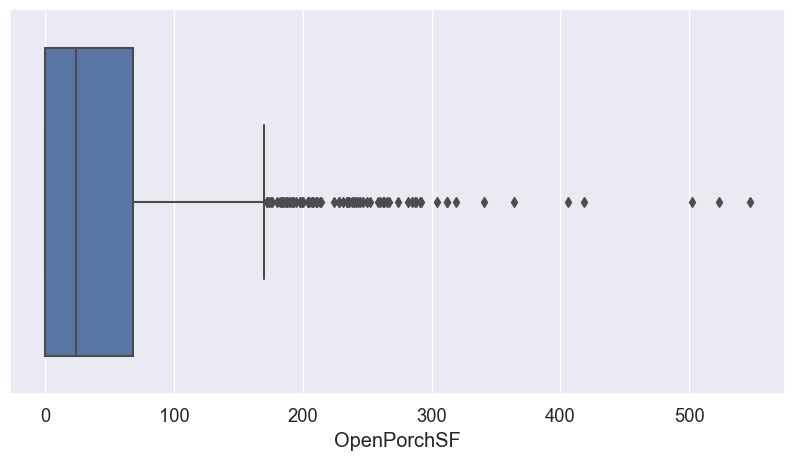

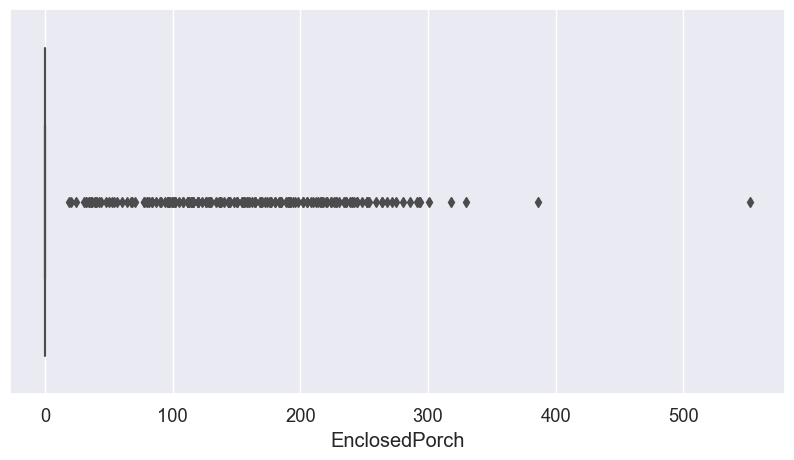

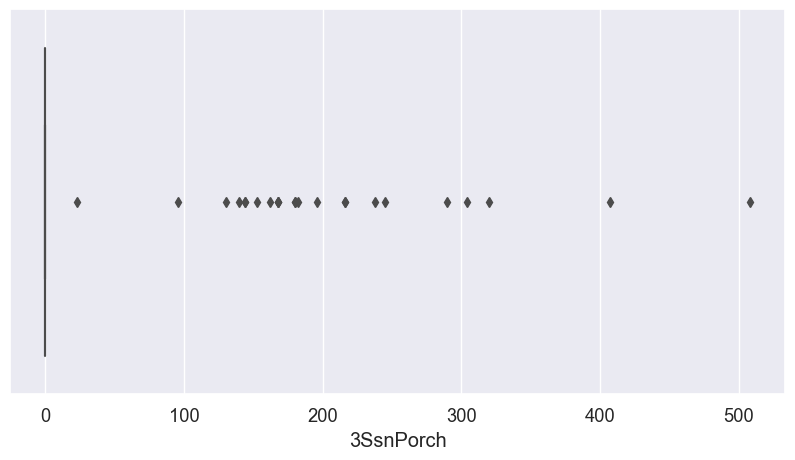

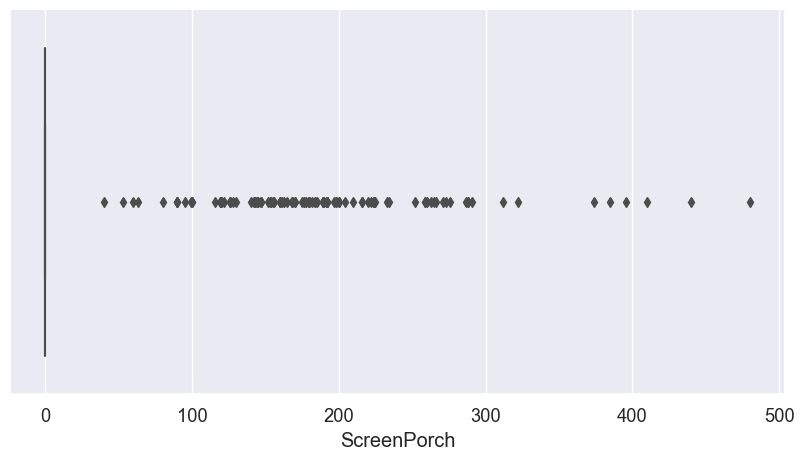

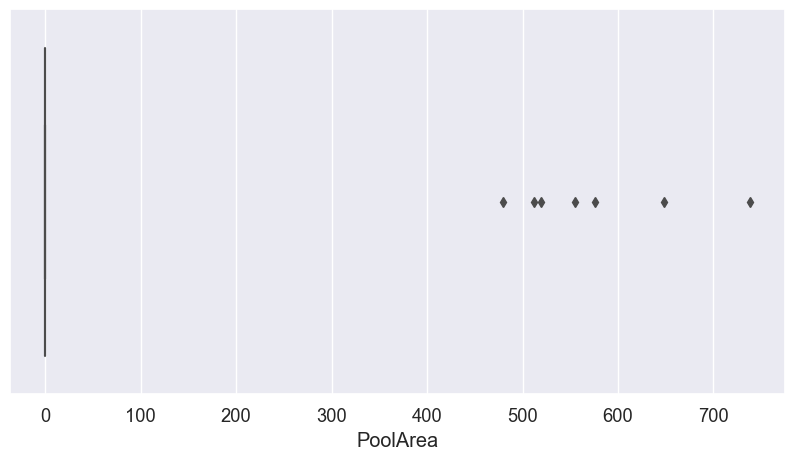

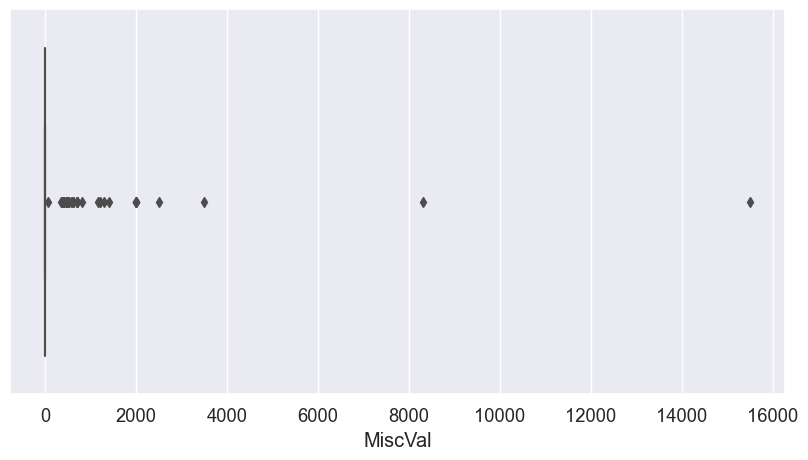

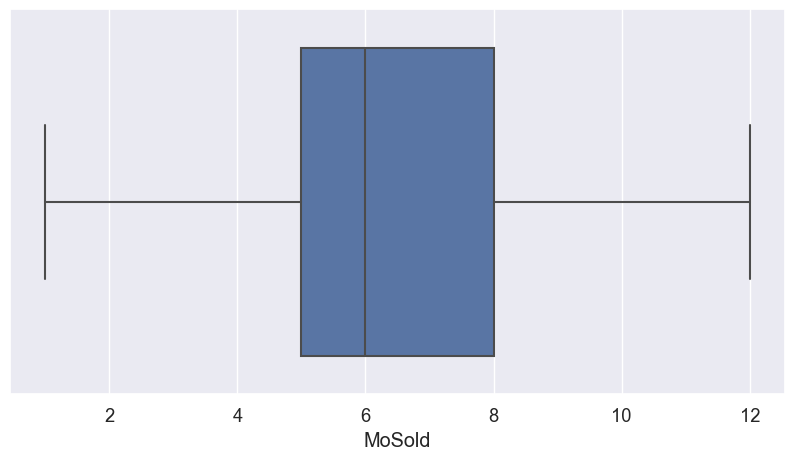

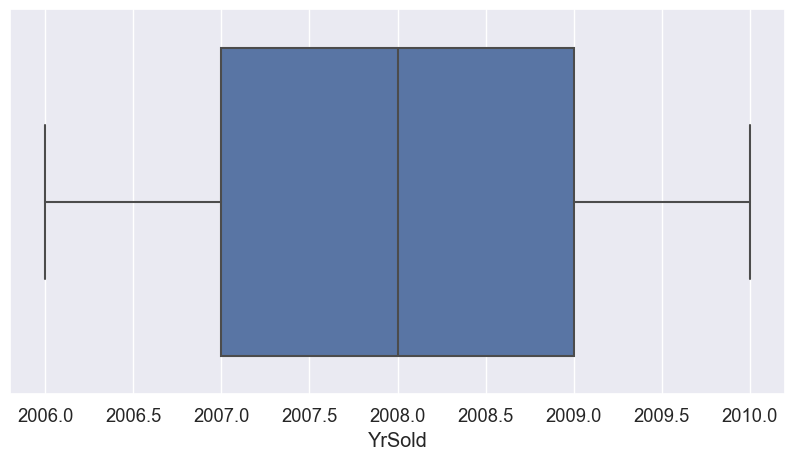

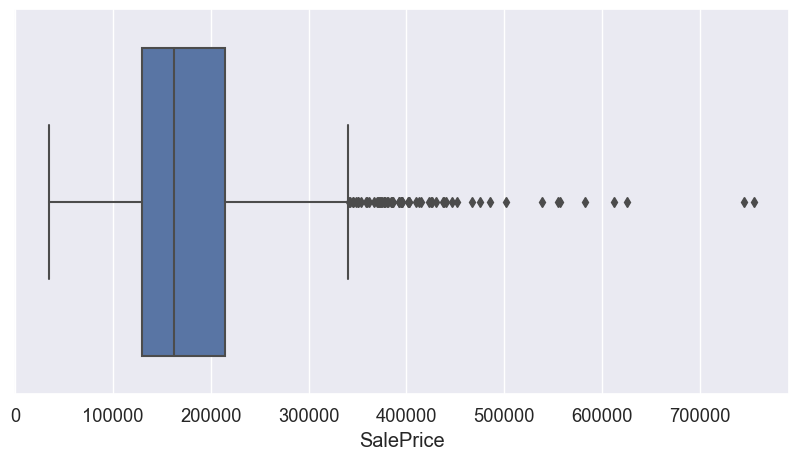

In [15]:
for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df_train[i])

There are a lot of outlier values that can be observed in boxplots. However, most of these values do not seem invalid, so only BsmtFinSF1 outliers shall be removed.

In [16]:
df_train.shape

(1451, 38)

In [17]:
# Outlier removal
def is_outlier(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_train = is_outlier(df_train, cols=['BsmtFinSF1'])

df_train.shape

(1444, 38)

In [18]:
# get_dummies for select few object-type features
dumm_list = [i for i in feature_object.index if i not in object_removal]

for i in dumm_list:
    dummy = pd.get_dummies(df_train[i], drop_first=True, prefix=i)
    df_train = pd.concat([df_train, dummy], axis=1)
    df_train = df_train.drop(i, axis=1)

### Model - LinearGAM  

In [19]:
features = df_train.drop(['SalePrice'], axis=1)
target = df_train['SalePrice']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ'],
      dtype='object')

In [22]:
gam = LinearGAM(s(0)+s(1)+f(2)+f(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+s(11)+s(12)
                 +s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)+s(22)+s(23)+s(24)+s(25)
                 +s(26)+s(27)+s(28)+s(29)+s(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)
                 +f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)
                 +f(52)+f(54)).gridsearch(X_train, y_train, n_splines=np.arange(24))

gam.summary()

100% (24 of 24) |########################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.8934
Link Function:                     IdentityLink Log Likelihood:                                -24098.5822
Number of Samples:                         1155 AIC:                                            48406.9512
                                                AICc:                                           48428.1264
                                                GCV:                                        547334077.6641
                                                Scale:                                      459492876.3638
                                                Pseudo R-Squared:                                   0.9323
Feature Function                  Lam

C:\Users\Michal\AppData\Local\Temp\ipykernel_8984\2423779629.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Using pygam for regression/classification problems allows great insight in created model structure. Each of the features can be manually set as linear (l), spline (s), factor (f) or tensor (te) - all of which can be further tinkered with.

In [23]:
print(f'Training MAPE: {metrics.mean_absolute_percentage_error(y_train, gam.predict(X_train))}')
print(f'Validation MAPE: {metrics.mean_absolute_percentage_error(y_val, gam.predict(X_val))}')
print(f'Validation R2 score: {metrics.r2_score(y_val, gam.predict(X_val))}')
print(f'Validation max error: {metrics.max_error(y_val, gam.predict(X_val))}')
print(f'Validation RMSE: {math.sqrt(metrics.mean_squared_error(y_val, gam.predict(X_val)))}')

Training MAPE: 0.08120972127195107
Validation MAPE: 0.08944447568431793
Validation R2 score: 0.9098667224203235
Validation max error: 102858.35821088078
Validation RMSE: 20275.770189399835


Partial dependency plots provided in pygam show how select feature values in created model affect the target. Given high quality of model - they bring knowledge in subject matter, furthering the understandment of topics studied. Subject expertise allows to quickly notice occurance of wrong dependencies while looking at the plots in underperforming models.  
Below there are plots for first 8 features - x values had been transformed with StandardScaler, but y (SalePrice) remain unchanged.

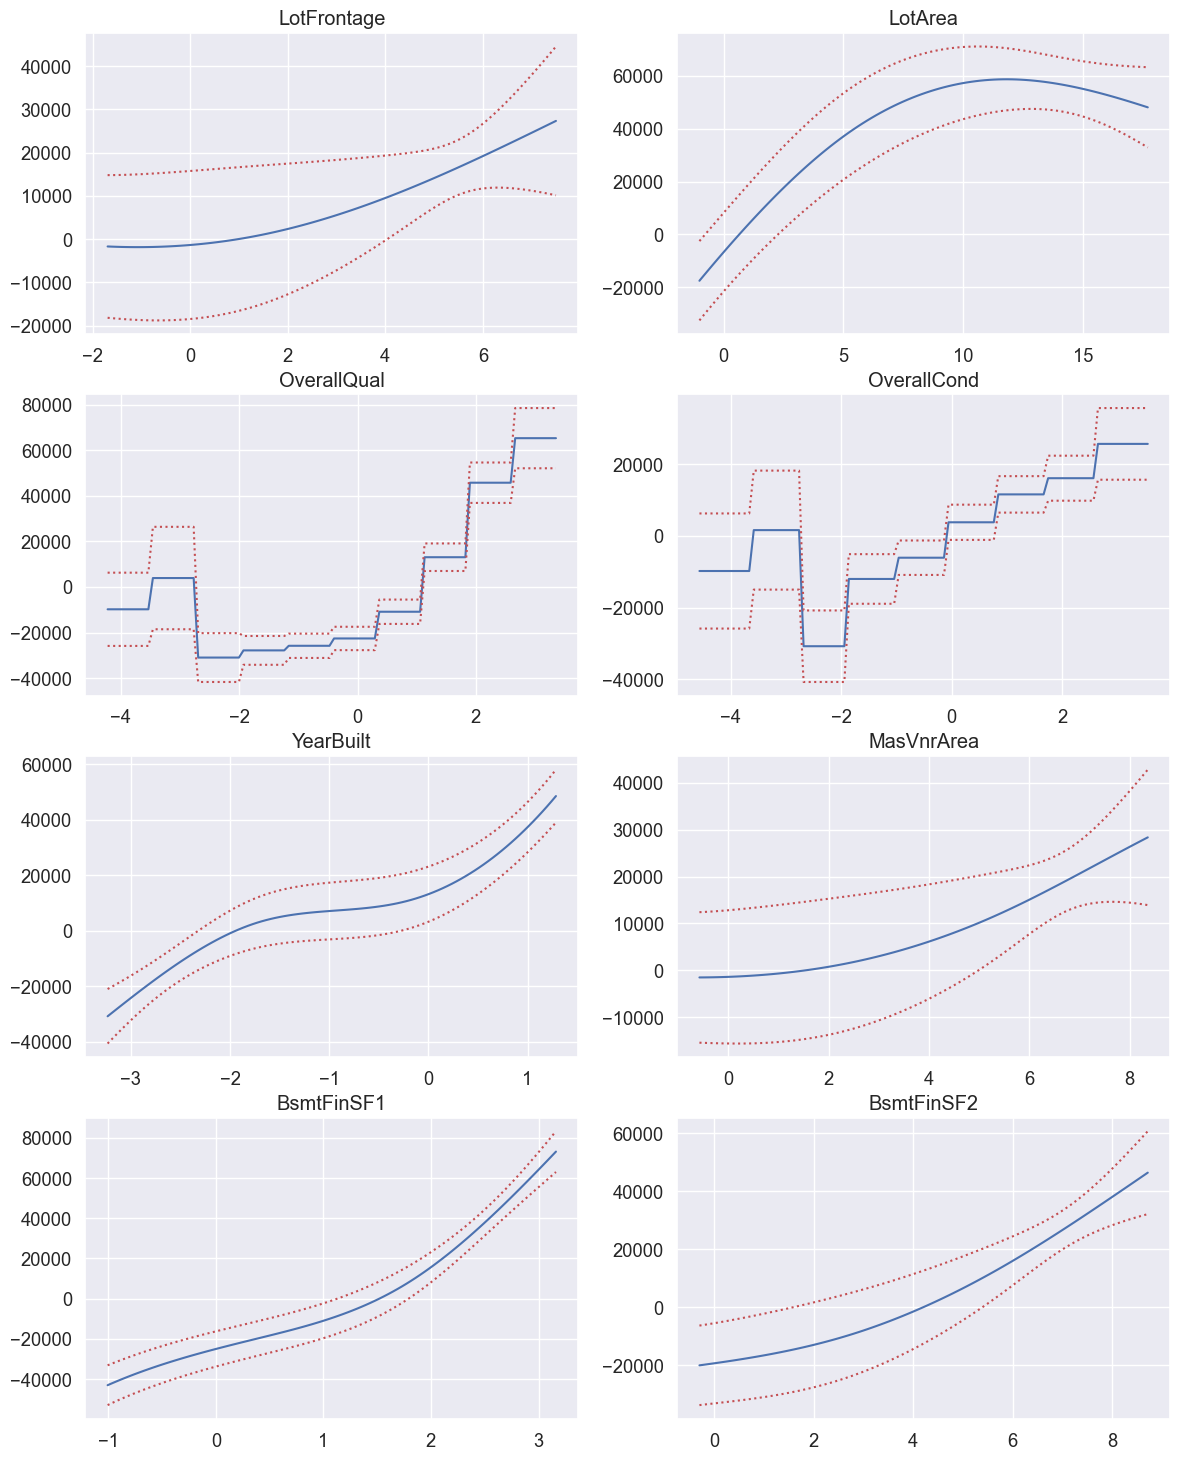

In [24]:
fig, axes = plt.subplots(4,2,figsize=(14,18))
for t, ax in zip(range(8),axes.flatten()):
    XX = gam.generate_X_grid(term=t)
    pdp, confi = gam.partial_dependence(term=t, X=XX, width=0.95)
    ax.plot(XX.T[t],pdp)
    ax.plot(XX.T[t],confi,c="r",ls=":")
    ax.set_title(features.columns[t])